\begin{equation}
Z = \sum e^{-\beta E[\{\sigma_i\}]} = \sum e^{-\beta (J \sum_{<i,j>} \sigma_i \sigma_j - h \sum_{i} \sigma_i)}
\end{equation}

\begin{equation}
-\frac{\partial}{\partial\beta} \ln Z = \sum E[\{\sigma_i\}] \frac{1}{Z} e^{-\beta E[\{\sigma_i\}]} = \left<E \right>
\end{equation}

\begin{align}
c_V &= \frac{1}{N} \frac{\partial}{\partial T} \left<E \right> = \frac{\partial \beta}{\partial T} \left( - \frac{\partial^2}{\partial\beta^2} \ln Z \right) \\
    &= \frac{1}{N T^2} \sum E[\{\sigma_i\}]^2 \frac{1}{Z} e^{-\beta E[\{\sigma_i\}]} - \frac{1}{N T^2} \sum E[\{\sigma_i\}] \frac{1}{Z} e^{-\beta E[\{\sigma_i\}]} \sum E[\{\sigma_i\}] \frac{1}{Z} e^{-\beta E[\{\sigma_i\}]} \\
    &= \frac{1}{N T^2} \left( \left<E^2 \right> - \left<E \right>^2 \right) = \frac{N}{T^2} \left( \left<\left(E/N \right)^2 \right> - \left<E/N \right>^2 \right)
\end{align}

\begin{equation}
\frac{\partial}{\partial h} \ln Z = \sum \beta \left( \sum_{i} \sigma_i \right) \frac{1}{Z} e^{-\beta (J \sum_{<i,j>} \sigma_i \sigma_j -h  \sum_{i} \sigma_i)} = \frac{1}{T} \left<M \right>
\end{equation}

\begin{align}
\chi &= \frac{1}{N} \frac{\partial}{\partial h} \left<M \right> = \frac{\partial}{\partial h} \left( T \frac{\partial}{\partial h} \ln Z \right) \\
    &= \frac{1}{NT} \sum \beta^2 \left( \sum_{i} \sigma_i \right)^2 \frac{1}{Z} e^{-\beta (J \sum_{<i,j>} \sigma_i \sigma_j -h \sum_{i} \sigma_i)} - \frac{1}{NT} \sum \beta \left( \sum_{i} \sigma_i \right) \frac{1}{Z} e^{-\beta (J \sum_{<i,j>} \sigma_i \sigma_j -h \sum_{i} \sigma_i)}  \sum \beta \left( \sum_{i} \sigma_i \right) \frac{1}{Z} e^{-\beta (J \sum_{<i,j>} \sigma_i \sigma_j -h \sum_{i} \sigma_i)} \\
    &= \frac{1}{NT} \left( \left< M^2 \right> - \left< M \right>^2 \right) = \frac{N}{T} \left( \left< m^2 \right> - \left< m \right>^2 \right)
\end{align}

In [8]:
using PyPlot
using Printf
using DelimitedFiles
using NBInclude
@nbinclude("ising_2d_lib.ipynb")

autocorrelation_time (generic function with 1 method)

# Visualization

1.5  2.27  

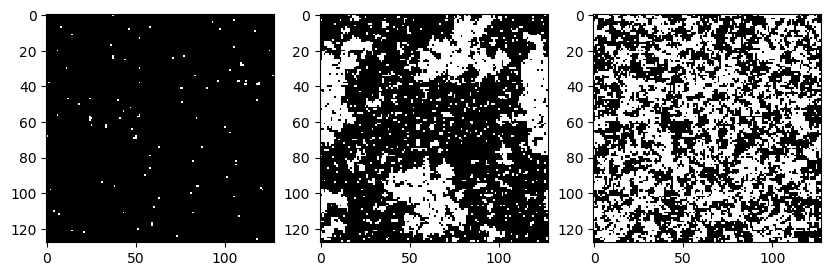

3.0  

In [7]:
figure(figsize=(10,3))

Length = 128
Config = initialize(Length, "random")

time = 2000

vec_Temperature = [1.5, 2.27, 3]
for index_Temperature = 1:length(vec_Temperature)
    Temperature = vec_Temperature[index_Temperature]
    print(Temperature, "  ")
    
    subplot(1, 3, index_Temperature)
    dynamics_tw(Config, Temperature, 4000)
    imshow(Config, cmap="gray")
end    

# Thermalization

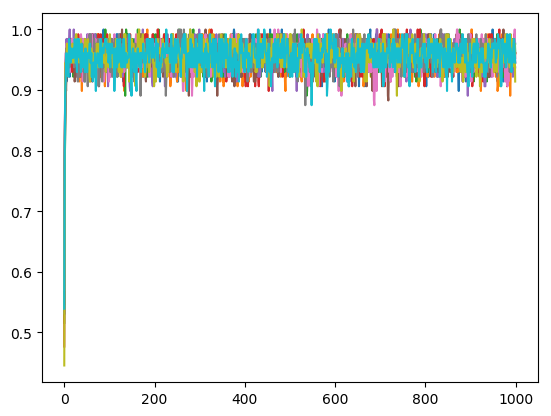

In [5]:
Length = 16

Temperature = 2
num_sample = 1000
num_sample_burn = 0
period_sample = 1

for iteration = 1:10
    Config = initialize(Length, "random")
    vec_magnetization, vec_energy = stream_glauber(Config, Temperature, num_sample, num_sample_burn, period_sample)
    plot(vec_magnetization./Length./Length)
end


# Autocorrelation

## Autocorrelation function graph

213.89420035646643
163.3463940773489
182.97765249156626
167.31184076539284


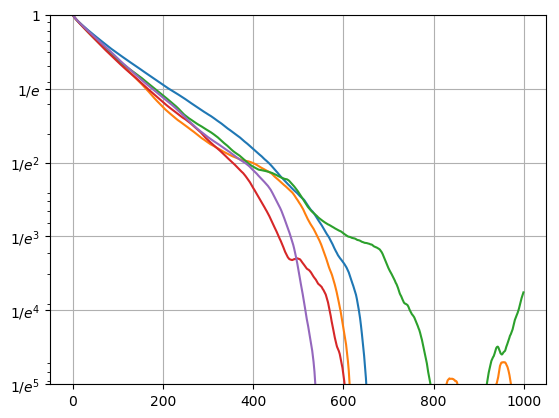

177.15218323149946


In [16]:
Length = 32
Config = initialize(Length, "random")

Temperature = 2.3
num_sample = Int(1e5)
num_sample_burn = 2000
period_sample = 1

for iteration = 1:5
    vec_magnetization, vec_energy = stream(Config, Temperature, num_sample, num_sample_burn, period_sample)
    println(autocorrelation_time(abs.(vec_magnetization), 1000))
    semilogy(autocorrelation_function(abs.(vec_magnetization), 1000))
end

ylim([exp(-5), 1])
yticks([1, exp(-1), exp(-2), exp(-3), exp(-4), exp(-5)],["1", L"$1/e$", L"$1/e^2$", L"$1/e^3$", L"$1/e^4$", L"$1/e^5$"])
grid()

Autocorrelation function of various methods

43.38749073999157
186.74826288610592
260.2891568012406


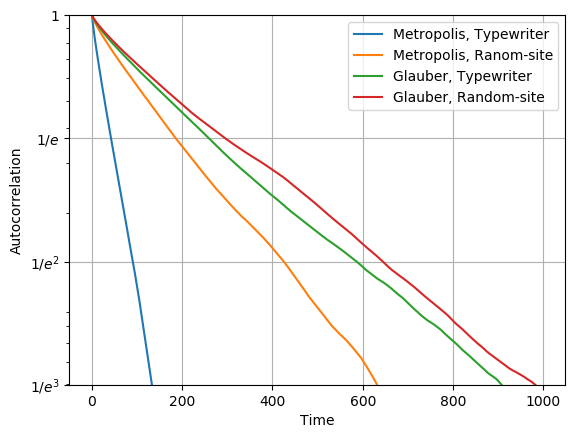

296.5211501288086


PyObject <matplotlib.legend.Legend object at 0x000000002424D0B8>

In [28]:
Length = 32
Config = initialize(Length, "random")

Temperature = 2.27
num_sample = Int(1e6)
num_sample_burn = 2000
period_sample = 1

vec_magnetization, vec_energy = stream_tw(Config, Temperature, num_sample, num_sample_burn, period_sample)
println(autocorrelation_time(abs.(vec_magnetization), 1000))
semilogy(autocorrelation_function(abs.(vec_magnetization), 1000))

vec_magnetization, vec_energy = stream(Config, Temperature, num_sample, num_sample_burn, period_sample)
println(autocorrelation_time(abs.(vec_magnetization), 1000))
semilogy(autocorrelation_function(abs.(vec_magnetization), 1000))

vec_magnetization, vec_energy = stream_glauber_tw(Config, Temperature, num_sample, num_sample_burn, period_sample)
println(autocorrelation_time(abs.(vec_magnetization), 1000))
semilogy(autocorrelation_function(abs.(vec_magnetization), 1000))

vec_magnetization, vec_energy = stream_glauber(Config, Temperature, num_sample, num_sample_burn, period_sample)
println(autocorrelation_time(abs.(vec_magnetization), 1000))
semilogy(autocorrelation_function(abs.(vec_magnetization), 1000))

yticks([1, exp(-1), exp(-2), exp(-3)],["1", L"$1/e$", L"$1/e^2$", L"$1/e^3$"])
ylim([exp(-3), 1])
grid()

xlabel("Time")
ylabel("Autocorrelation")
legend(["Metropolis, Typewriter", "Metropolis, Ranom-site", "Glauber, Typewriter", "Glauber, Random-site"])

## Autocorrelation time

In [177]:
Length = 24
Config = initialize(Length, "random")

Temperature = 2
num_sample = Int(1e5)
num_sample_burn = 100
period_sample = 1

vec_Temperature = vcat(1.5:0.1:2.2, 2.21:0.01:2.49, 2.5:0.1:3)
data_tau_m = zeros(length(vec_Temperature))
data_tau_e = zeros(length(vec_Temperature))
data_tau_m_error = zeros(length(vec_Temperature))
data_tau_e_error = zeros(length(vec_Temperature))

iteration_max = 10
vec_tau_m = zeros(iteration_max)
vec_tau_e = zeros(iteration_max)

for index_Temperature = 1:length(vec_Temperature)
    Temperature = vec_Temperature[index_Temperature]
    for iteration = 1:iteration_max
        vec_magnetization, vec_energy = stream_tw(Config, Temperature, num_sample, num_sample_burn, period_sample)
        vec_tau_m[iteration] = autocorrelation_time(abs.(vec_magnetization), 200)
        vec_tau_e[iteration] = autocorrelation_time(vec_energy, 200)        
    end
    data_tau_m[index_Temperature] += mean(vec_tau_m)
    data_tau_e[index_Temperature] += mean(vec_tau_e)
    data_tau_m_error[index_Temperature] += std(vec_tau_m)/sqrt(iteration_max)
    data_tau_e_error[index_Temperature] += std(vec_tau_e)/sqrt(iteration_max)
    println(Temperature, "  ", data_tau_m[index_Temperature], "  ", data_tau_e[index_Temperature], "  ", data_tau_m_error[index_Temperature], "  ", data_tau_e_error[index_Temperature])
end

1.5  4.164690756767828  1.7690097741492896  2.3766832360420844  0.0028910035245955333
1.6  1.8447981740393018  1.8048561500027813  0.0017697018291950495  0.001354157227984591
1.7  1.9323929457324056  1.8579967166390816  0.0016425469756146554  0.0010543200731409875
1.8  2.1667302857357233  1.9254006944037152  0.009871906772141005  0.0012856714931979221
1.9  2.6256174413734614  2.0679833644607095  0.011049610779227835  0.005084769057814908
2.0  3.650881046640418  2.431271061817598  0.19151927998703278  0.010369255110220124
2.1  6.566050187110522  2.9431952148593714  0.23424637456925412  0.010529698183924793
2.2  17.182998083808602  4.747124654695191  0.3774740333463983  0.03632958126516144
2.21  18.186275400120145  5.016398677291173  0.5950033892067604  0.0469573044710587
2.22  20.501461503727743  5.517798957010973  0.5381745619390702  0.0626107426384989
2.23  20.644470310282326  5.843543816120269  0.4885308403426484  0.06232064108148094
2.24  21.19214853861007  6.227158655013267  0.5086

In [178]:
writedlm(@sprintf("data/correlation_time_tw_L%d.txt",Length), hcat(vec_Temperature, data_tau_m, data_tau_m_error, data_tau_e, data_tau_e_error))

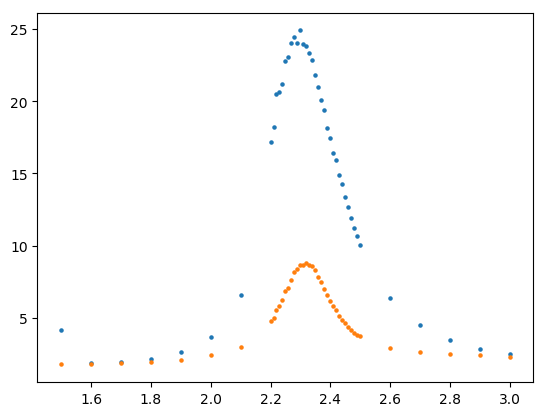

PyObject <matplotlib.collections.PathCollection object at 0x0000000021E764E0>

In [179]:
#errorbar(vec_Temperature, data_tau_m, data_tau_m_error)
#errorbar(vec_Temperature, data_tau_e, data_tau_e_error)
scatter(vec_Temperature, data_tau_m, 5)
scatter(vec_Temperature, data_tau_e, 5)

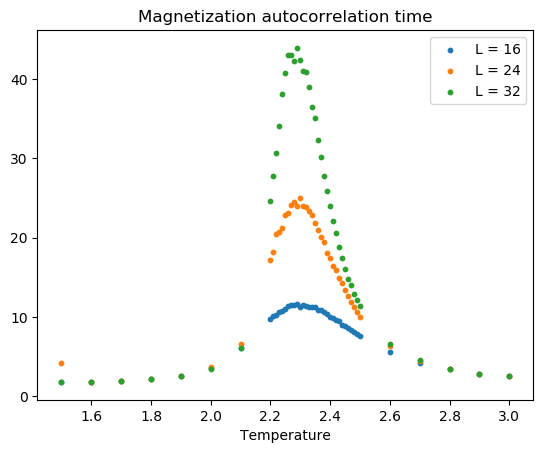

PyObject Text(0.5,24,'Temperature')

In [147]:
figure()
for Length=[16 24 32]
    data = readdlm(@sprintf("data/correlation_time_tw_L%d.txt",Length));
    scatter(data[:,1], data[:,2], 10)
end
legend(["L = 16", "L = 24", "L = 32"])
title("Magnetization autocorrelation time")
xlabel("Temperature")

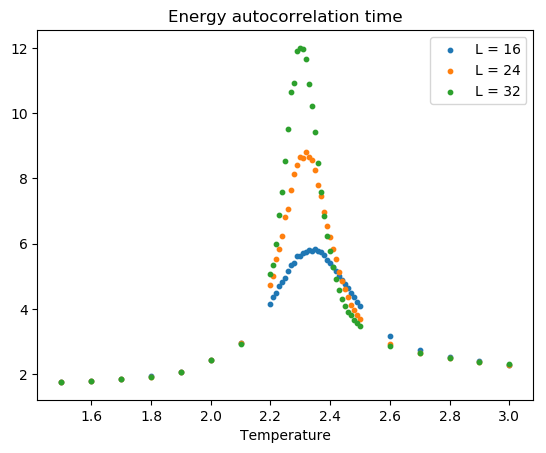

PyObject Text(0.5,24,'Temperature')

In [149]:
figure()
for Length=[16 24 32]
    data = readdlm(@sprintf("data/autocorrelation_time_tw_L%d.txt",Length));
    scatter(data[:,1], data[:,4], 10)
end
legend(["L = 16", "L = 24", "L = 32"])
title("Energy autocorrelation time")
xlabel("Temperature")

# Physical quantities

In [7]:
Length = 16
Config = initialize(Length, "random")

num_sample = 1000
num_sample_burn = 100

vec_Temperature = vcat(1.5:0.1:2.2, 2.21:0.01:2.49, 2.5:0.1:3) 
data_magnetization = zeros(length(vec_Temperature))
data_chi = zeros(length(vec_Temperature))
data_energy = zeros(length(vec_Temperature))
data_cv = zeros(length(vec_Temperature))

for index_Temperature = 1:length(vec_Temperature)
    Temperature = vec_Temperature[index_Temperature]
    print(Temperature, "  ")
    if 2.2 < Temperature < 2.4
        period_sample = 100
    else
        period_sample = 50
    end

    vec_magnetization, vec_energy = stream_tw(Config, Temperature, num_sample, num_sample_burn, period_sample)
    
    data_magnetization[index_Temperature] = mean(abs.(vec_magnetization)) /Length^2
    data_chi[index_Temperature] =  var(abs.(vec_magnetization)) /Length^4
    data_energy[index_Temperature] = mean(vec_energy) /Length^2
    data_cv[index_Temperature] =  var(vec_energy) /Length^4
end    

1.5  1.6  1.7  1.8  1.9  2.0  2.1  2.2  2.21  2.22  2.23  2.24  2.25  2.26  2.27  2.28  2.29  2.3  2.31  2.32  2.33  2.34  2.35  2.36  2.37  2.38  2.39  2.4  2.41  2.42  2.43  2.44  2.45  2.46  2.47  2.48  2.49  2.5  2.6  2.7  2.8  2.9  3.0  

In [178]:
writedlm(@sprintf("data/magnetization_L%d.txt",Length), hcat(vec_Temperature, data_magnetization, data_chi, data_energy, data_cv))

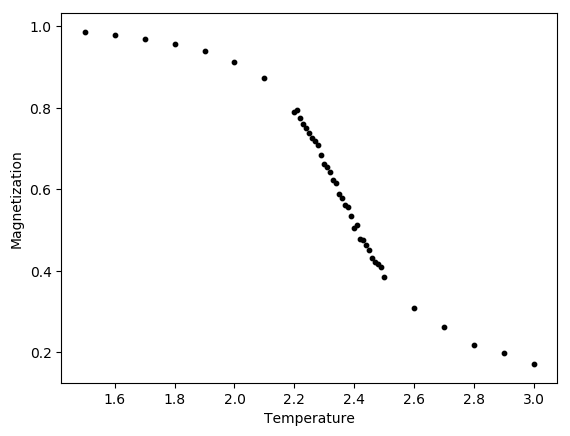

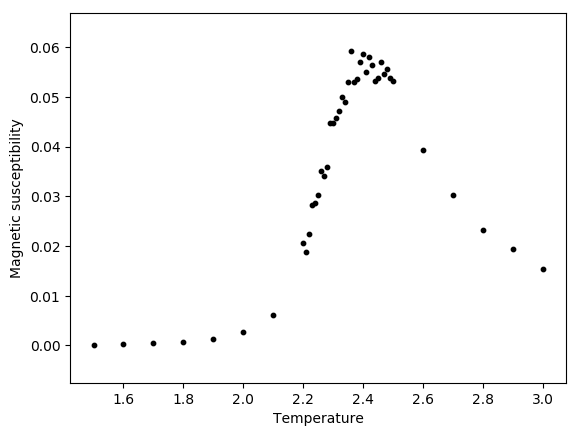

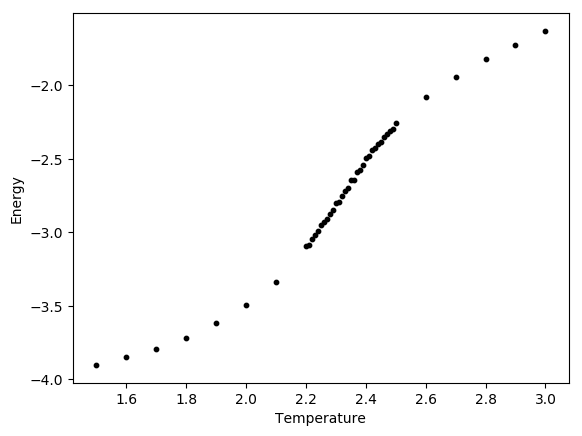

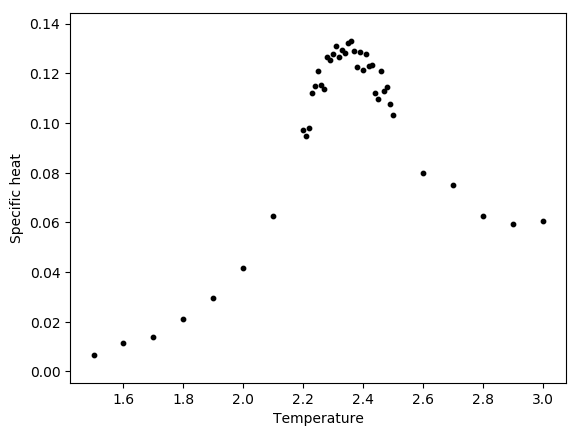

PyObject Text(0.5,24,'Temperature')

In [69]:
figure(figsize=(10,3))
subplot(1,2,1)
scatter(vec_Temperature, data_magnetization, 10, "black")
ylabel("Magnetization")
xlabel("Temperature")
subplot(1,2,2)
scatter(vec_Temperature, data_chi, 10, "black")
ylabel("Magnetic susceptibility")
xlabel("Temperature")

figure(figsize=(10,3))
subplot(1,2,1)
scatter(vec_Temperature, data_energy, 10, "black")
ylabel("Energy")
xlabel("Temperature")
subplot(1,2,2)
scatter(vec_Temperature, data_cv, 10, "black")
ylabel("Specific heat")
xlabel("Temperature")